<a href="https://colab.research.google.com/github/Diego875621/Data_Science/blob/main/Fetal%20Health%20Classification/Classifica%C3%A7%C3%A3o_de_Sa%C3%BAde_Fetal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Saúde Fetal - Business Understanding (Introdução)**


<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Fetal%20Health%20Classification/baby.jpg?raw=true" width="50%"></p>
<p align=center>Fonte: Freepik

Essa análise será feita a partir dos dados do [Kaggle](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification) sobre classificação da saúde fetal levando em conta os dados obtidos através do exame de cardiotocografia fetal. As informações abaixo têm como base o artigo de Grivell e demais pesquisadores (2015).

Primeiro, precisamos saber o que é a cardiotocografia (CTG). Esse exame permite que a frequência cardíaca fetal, a atividade uterina e a percepção de movimento fetal sejam registradas. Esses achados são obtidos através de um transdutor de ultrasom colocado no abdome da mãe e outro transdutor sobre o fundo do útero para registrar a frequência cardíaca fetal e a atividade uterina, respectivamente.

Seu conceito se baseia em um teste de triagem para a identificação de bebês com hipóxia aguda ou crônica ou em perigo de desenvolver hipóxia (baixa oxigenação). Essa condição pode resultar em adaptações patológicas específicas no feto, de modo a alterar seus parâmetros cardíacos.

Seu objetivo é avaliar a vitalidade do feto dentro do útero e é indicado para gestantes de baixo risco e principalmente para gestantes de alto risco, como por exemplo gestantes que têm anemias ou hipertensão/diabetes. É usado tambem antes (geralmente no terceiro semestre) e durante o parto.

## Interpretação do CTG

> Frequência cardíaca fetal base (FCF base ou *Baseline FHR*) 

Deve estar num intervalo de 110-160 batimentos por minuto (bpm). Valores abaixo de 110 bpm indica bradicardia e valores acima de 160 bpm indica taquicardia, ou seja diminuição ou aumento da frequência cardíaca, respectivamente.

> Variabilidade 

Variabilidade entre um batimento e o outro. Deve ser maior que 5 bmp. Menor que 5 pode indicar hipoxia, bebê dormindo ou uso de medicamentos que interferiram no exame.

> Acelerações

Deve ter 2 ou mais acelerações da frequência cardíaca fetal superiores a 15 bmp, por pelo menos 15 segundos dentro de um período de 20 minutos (padrão reativo).

> Desacelerações

Fator crítico. Desaceleração da frequência cardíaca fetal. Normalidade: Sem desacelerações.

> Saúde Fetal

**Classe 1 (Normal)** - FCF base normal, variabilidade moderada, desaceleração tardia ausente e desaceleração precoce presente ou ausente. Conclusão: sem hipóxia.

**Classe 2 (Suspeita/inconclusiva)** - bradicardia ou taquicardia, variabilidade mínima, ausente ou acentuada. Conclusão: baixa probabilidade de hipóxia/acidose.

**Classe 3 (Patológico)** - bradicardia, variabilidade mínima ou acentuada, desaceleração tardia ou prolongada por mais de 30 minutos. Conclusão: alta probabilidade de hipóxia/acidose.



# **Dicionário de Variáveis**

- baseline value - Frequência Cardíaca Fetal base (Baseline Fetal Heart Rate (FCF)) em bpm

- accelerations - Número de acelerações por segundo      

- fetal_movement - Número de movimentos fetais por segundo           
                              
- uterine_contractions - Número de contrações uterinas por segundo             
                        
---
**Desacelerações**

- light_decelerations - Número de desacelerações leves por segundo              
                          
- severe_decelerations - Número de desacelerações severas por segundo        
                            
- prolongued_decelerations - Número de desacelerações prolongadas por segundo        
                           
---
**Variabilidade**

- abnormal_short_term_variability - Percentual do tempo com variabilidade anormal de curto prazo
                      
- mean_value_of_short_term_variability - Média dos valores com variabilidade de curto prazo
                    
- percentage_of_time_with_abnormal_long_term_variability - Percentual do tempo com variabilidade anormal de *longo* prazo  
 
- mean_value_of_long_term_variability - Média dos valores com variabilidade de *longo* prazo                 
     
---
**Histograma**

- histogram_width - Largura do histograma feito usando todos os valores de um registro                                      
    
- histogram_min - Valor mínimo do histograma                
                             
- histogram_max - Valor máximo do histograma                   
                         
- histogram_number_of_peaks - Número de picos no histograma do exame       
                         
- histogram_number_of_zeroes - Número de zeros no histograma do exame        
                       
- histogram_mode - Modo do histograma                        
                    
- histogram_mean - Média do histograma                       
                    
- histogram_median - Mediana do histograma                        
                   
- histogram_variance - Variância do histograma                        
                  
- histogram_tendency - Tendência do histograma                         
                
---                
- fetal_health - Saúde fetal (1 - Normal, 2 = Suspeita, 3 = Patológica)                               
              

# **Análise Exploratória**

In [ ]:
!pip install fast_ml --upgrade -q

In [ ]:
from fast_ml.model_development import train_valid_test_split
from fast_ml.utilities import display_all
from fast_ml import eda

In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import log_loss, matthews_corrcoef

from imblearn.under_sampling import RandomUnderSampler

from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = 'https://raw.githubusercontent.com/Diego875621/Data_Science/main/Fetal%20Health%20Classification/fetal_health.csv'

df = pd.read_csv(data)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
# Formatação certa de baseline_value
df.rename(columns = {'baseline value' : 'baseline_value'}, inplace=True) 

In [ ]:
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
print('Tamanho do dataset \n')

print('Linhas:', df.shape[0])
print('Colunas:', df.shape[1])

Tamanho do dataset 

Linhas: 2126
Colunas: 22


Boas notícias, nenhum valor ausente no dataset!

In [ ]:
df_summary = eda.df_info(df)
display_all(df_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
baseline_value,float64,Numerical,48,"[120.0, 132.0, 133.0, 134.0, 122.0, 151.0, 150...",0,0.0
accelerations,float64,Numerical,20,"[0.0, 0.006, 0.003, 0.007, 0.001, 0.005, 0.009...",0,0.0
fetal_movement,float64,Numerical,102,"[0.0, 0.072, 0.222, 0.408, 0.38, 0.441, 0.383,...",0,0.0
uterine_contractions,float64,Numerical,16,"[0.0, 0.006, 0.008, 0.01, 0.013, 0.002, 0.003,...",0,0.0
light_decelerations,float64,Numerical,16,"[0.0, 0.003, 0.009, 0.008, 0.001, 0.002, 0.005...",0,0.0
severe_decelerations,float64,Numerical,2,"[0.0, 0.001]",0,0.0
prolongued_decelerations,float64,Numerical,6,"[0.0, 0.002, 0.003, 0.001, 0.004, 0.005]",0,0.0
abnormal_short_term_variability,float64,Numerical,75,"[73.0, 17.0, 16.0, 26.0, 29.0, 83.0, 84.0, 86....",0,0.0
mean_value_of_short_term_variability,float64,Numerical,57,"[0.5, 2.1, 2.4, 5.9, 6.3, 0.3, 1.9, 2.0, 1.4, ...",0,0.0
percentage_of_time_with_abnormal_long_term_variability,float64,Numerical,87,"[43.0, 0.0, 6.0, 5.0, 9.0, 8.0, 79.0, 72.0, 14...",0,0.0


- `fetal_health` - É a nossa variável alvo (target). Ela possui 3 classes diferentes, então, estamos tratando de um problema Multiclass. 

- Todas as features estão em valores e formatos numéricos

- Não há valores ausentes (Nan)

In [ ]:
# Descrição estatística
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


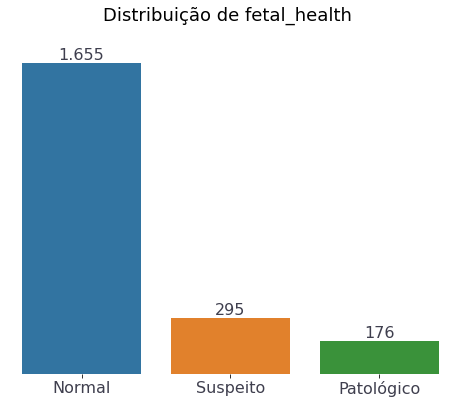

In [ ]:
# Distribuição de fetal_health

f, ax = plt.subplots(figsize=(8,6))

sns.countplot(x = 'fetal_health', data=df, ax=ax);

plt.title('Distribuição de fetal_health \n', fontsize=18)
ax.set_xticklabels(['Normal', 'Suspeito', 'Patológico'], fontsize=16, color='#3f3f4e')
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_xlabel(' ')

# Visualização - números sobre as barras

for hist in ax.patches:
  ax.text(hist.get_x() + hist.get_width() / 2,
          hist.get_height() + 20,
          '{:,}'.format(int(hist.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=16 , color='#3f3f4e')


plt.show()

Com a visualização da contagem da feature target `fetal_health` podemos perceber um claro **desbalanceamento**. Ou seja, temos muito mais dados de pacientes saudáveis do que suspeitos ou patológicos.

#**Manipulação**

Afim de facilitar a manipulação dos dados, será criado uma cópia do dataframe (`df1`) com a unificação da feature `fetal_health` como binária: 0 para saudáveis ou suspeitos e 1 para patológicos.

--------



In [ ]:
# Cópia e binarização
df1 = df.copy()
df1['fetal_health'] = df1['fetal_health'] > 2

# LabelEncoder
le = LabelEncoder()
df1['fetal_health'] = le.fit_transform(df1['fetal_health'])

In [ ]:
# Contagem de valores do novo 'fetal_health'
df1['fetal_health'].value_counts()

0    1950
1     176
Name: fetal_health, dtype: int64

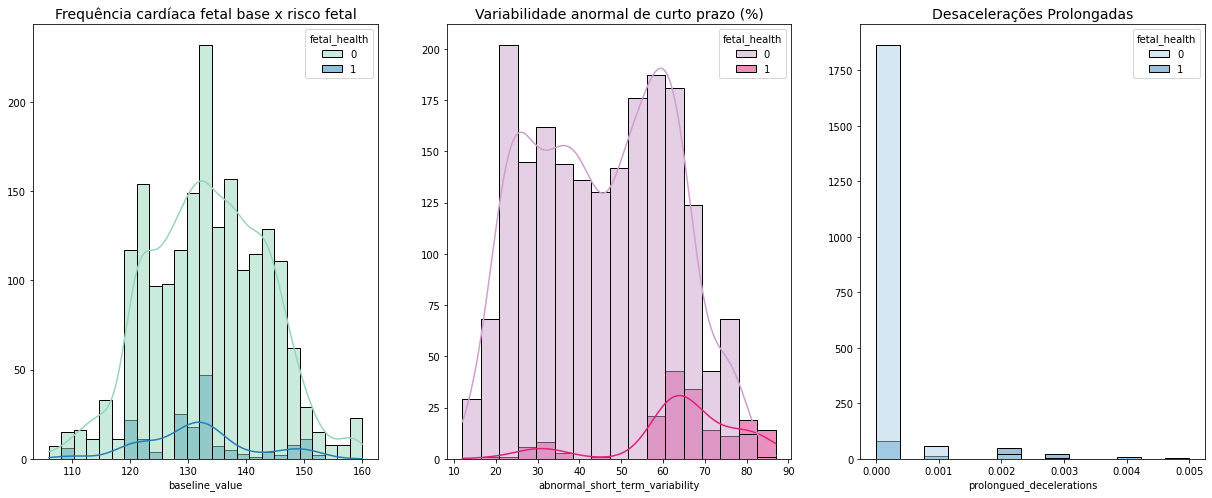

In [ ]:
f, axs = plt.subplots(1,3, figsize=(21,8))

sns.histplot(x= 'baseline_value', hue='fetal_health', data=df1, palette='YlGnBu', ax=axs[0], kde=True)
axs[0].set_title('Frequência cardíaca fetal base x risco fetal', fontsize=14)
axs[0].set_ylabel('')

sns.histplot(x= 'abnormal_short_term_variability', hue='fetal_health', data=df1, palette='PuRd', ax=axs[1], kde=True)
axs[1].set_title('Variabilidade anormal de curto prazo (%)', fontsize=14)
axs[1].set_ylabel('')

sns.histplot(x= 'prolongued_decelerations', hue='fetal_health', data=df1, palette='Blues', ax=axs[2])
axs[2].set_title('Desacelerações Prolongadas', fontsize=14)
axs[2].set_ylabel('')

plt.show();

* Podemos observar fetos em zonas patólogicas nos valores de frequência cardíaca fetal base (FCF) nos seguintes bpm: 110, acima de 120, e principalmente entre 127-135. 

> É necessário enfatizar que esses parâmetro isolado não necessariamente implica condições patólogicas, como visto em fetos saudáveis com FCF acima de 120 bpm em diante.

* Acima de 55% em diante do tempo com variabilidade anormal de curto prazo já aumenta significantemente o risco de feto patológico. É também encontrado risco, porém em menor proporção entre 25-40%

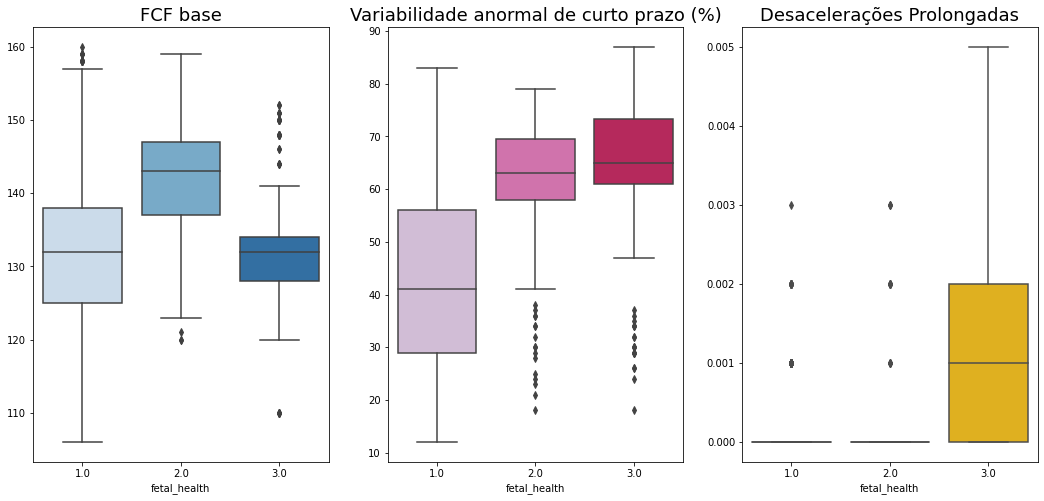

In [ ]:
f, axs = plt.subplots(1,3, figsize=(18,8))

sns.boxplot(y= 'baseline_value', x='fetal_health', data=df, palette='Blues', ax=axs[0])
axs[0].set_title('FCF base', fontsize=18)
axs[0].set_ylabel('')

sns.boxplot(y= 'abnormal_short_term_variability', x='fetal_health', data=df, palette='PuRd', ax=axs[1])
axs[1].set_title('Variabilidade anormal de curto prazo (%)', fontsize=18)
axs[1].set_ylabel('')

sns.boxplot(y= 'prolongued_decelerations', x='fetal_health', data=df, palette='autumn', ax=axs[2])
axs[2].set_title('Desacelerações Prolongadas', fontsize=18)
axs[2].set_ylabel('')

plt.show();

A FCF base não parece indicar muitas informações, pois a classe normal parece abranger o suspeito e o patológico.

A variabilidade anormal de curto prazo parece indicar mais informações. A grande maioria dos fetos suspeitos e/ou patológicos se encontram numa faixa de 55% adiante considerandos o intervalo inter-quartil (IQR) de cada classe.

As desacelerações prolongadas aponta claramente que a classe patológica é a que predomina com valores que variam de 0.001 até 0.005 enquanto as outras duas classes se encontram zeradas (com exceção dos outliers.

Podemos ver vários outliers nestes gráficos. Devemos lembrar que nem todos os fetos que possuem algum tipo de alteração são necessariamente patológicos. Como por exemplo, talvez a mãe tenha tomado medicamentos que causaram sedação e assim, diminuem a estimulação do feto temporariamente.

Porém, quando vários fatores, como `abnormal_short_term_variability` e `prolongued_decelerations` vão se adicionando, a probabilidade de risco patológico tende a aumentar.

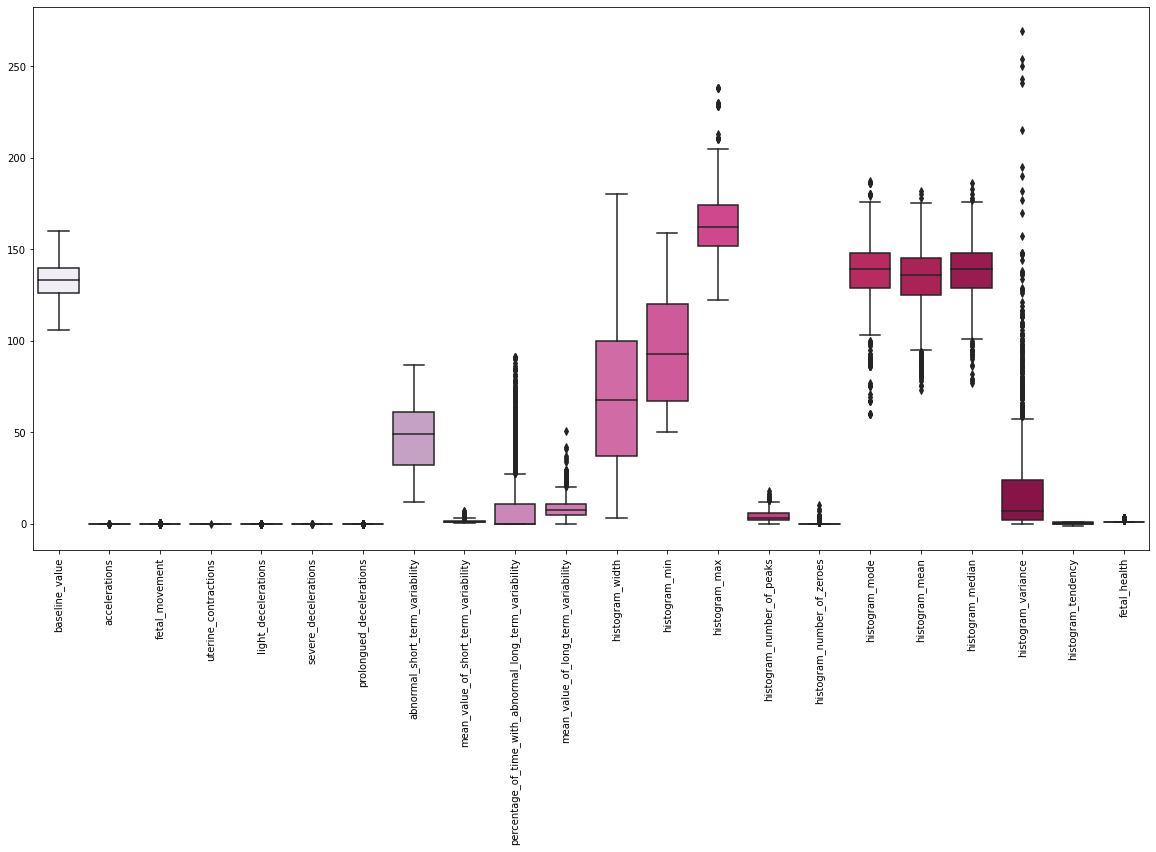

In [ ]:
# Boxplot de todas as features (fora target)
plt.figure(figsize=(20,10))
sns.boxplot(data = df, palette = 'PuRd')
plt.xticks(rotation=90)
plt.show()

O gráfico de caixa de todas as features indicam escalas muito diferentes, necessitando padronização. Além disso, há outliers em várias features, no entando, devemos entender que isso é esperado, pois mesmo que o exame esteja alterado, é necessário mais investigações, como a clínica da paciente e exames mais complexos.

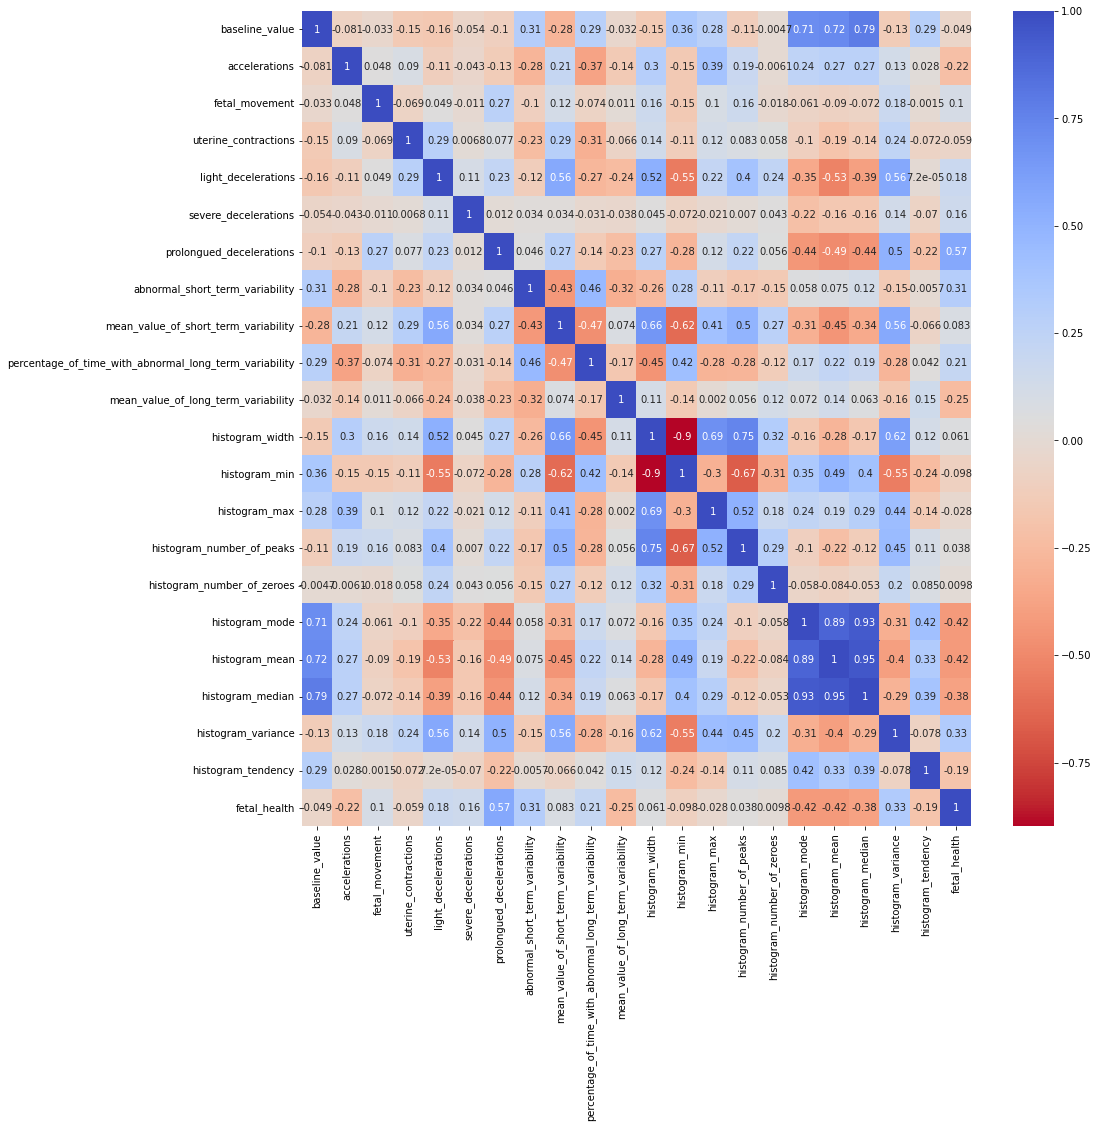

In [ ]:
# Correlação df1
corr = df1.corr()

f = plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap = 'coolwarm_r', annot=True)
plt.show()

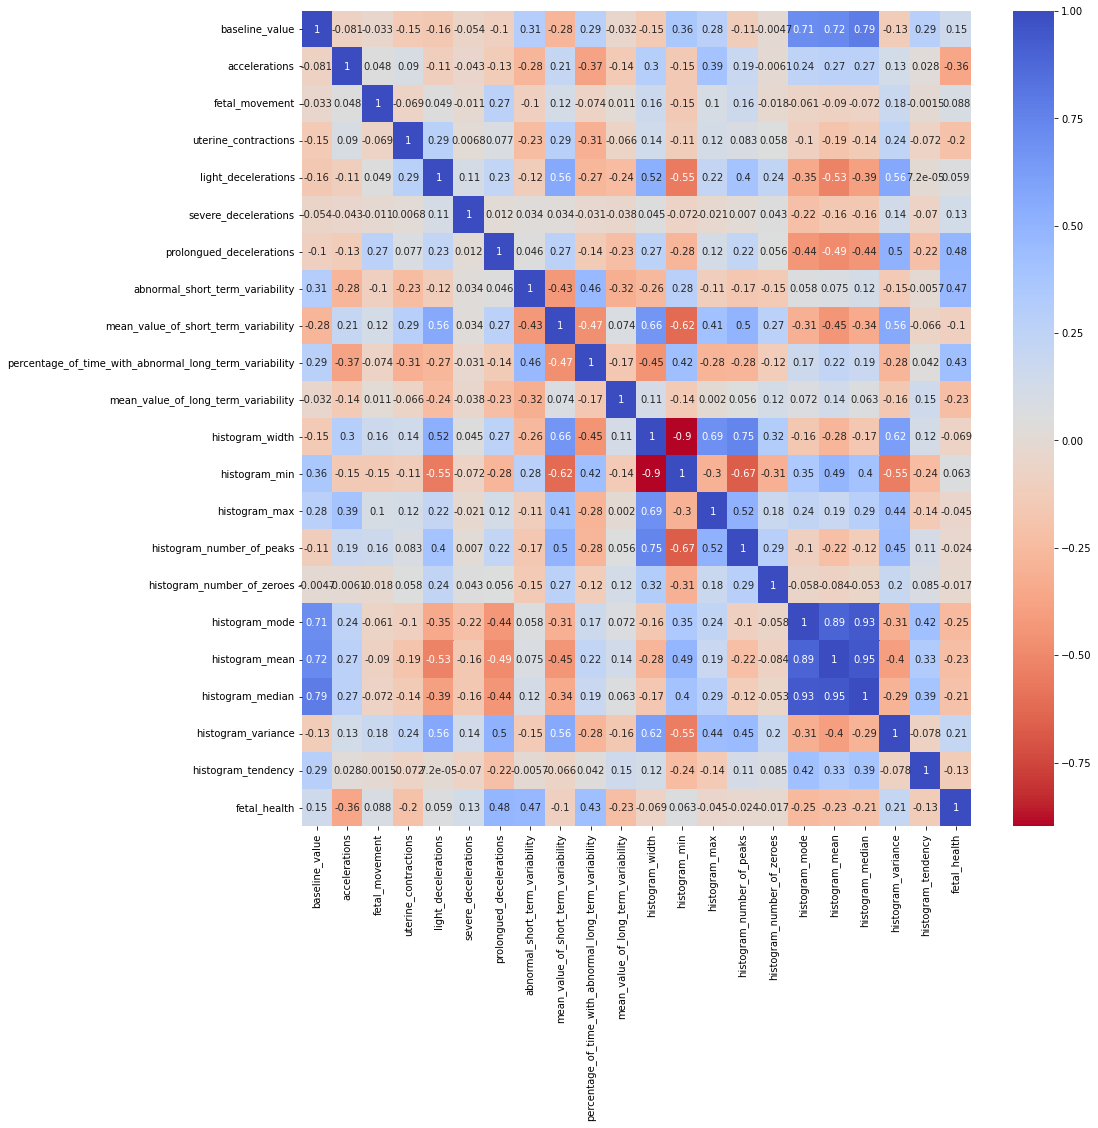

In [ ]:
# Correlação df
corr = df.corr()

f = plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap = 'coolwarm_r', annot=True)
plt.show()

Há uma maior correlação com fetal_health as seguintes features:

Correlação positiva:

* `prolongued_decelerations`       
* `abnormal_short_term_variability`         

Correlação negativa:

* `accelerations`   

Já no `df1`, temos resultados semelhantes, além de maior correlação negativa das features `histogram_mode` e `histogram_mean`


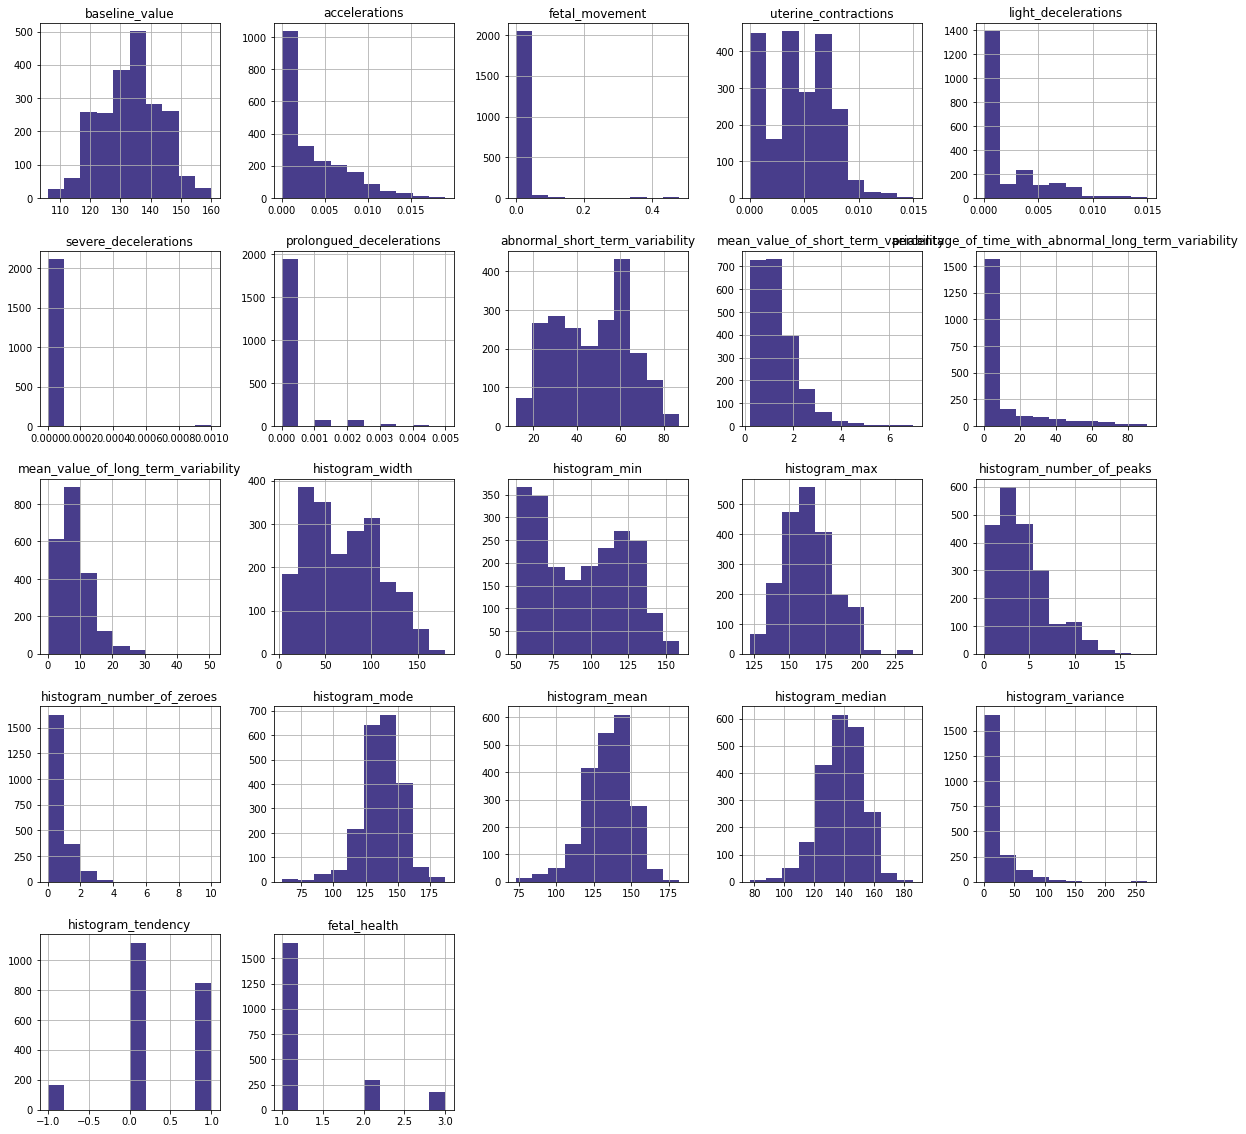

In [ ]:
df.hist(figsize=(20,20), color = "#483D8B");

Várias features estão com distribuições distorcidas (por exemplo, `histogram_variance`, `fetal_movement`, etc.). Para resolver isso, podemos usar uma simples padronização.

# **Machine Learning**

Para datasets do tipo Multiclass normalmente é mais útil utilizar as médias das métricas de classificação. Por exemplo, ao invés de analisar somente a métrica F1 score de forma isolada, podemos medir o `f1_macro` - a média aritmética - ou `f1_weighted` - a média ponderada considerando as classes. Nessa análise, focaremos na `f1_weighted` pois temos um dataset desbalanceando, e a média ponderada das métricas. Além das clássicas métricas (precision, recall, f1_score, roc_auc), usaremos também o `log_loss` e `matthews_corrcoef`.

O `log_loss` avalia o quão perto o valor previsto corresponde ao valor verdadeiro, quanto maior divergência, maior sera o log_loss. Então, quanto menor o valor, mais preciso o modelo é.

O `matthews_corrcoef` é Coeficiente de correlação de Matthews. Essa métrica mede o grau de harmonia entre todos os resultados possíveis (verdadeiros e falsos positivos e negativos. É particulamente útil em datasets binários ou multiclass. Quanto mais próximo de 1, melhor. 

Nessa etapa será feita a padronização dos dados com `StandardScaler` para ficarem em escalas semelhantes; o balanceamento com `RandomUnderSampler` e a divisão do dataset em treino x teste. Para garantir que as divisões serão proporcionais e randômicas, `stratify` e `shuffle` serão usados, respectivamente.



In [ ]:
# Divisão features x target
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']

# Padronização com RobustScaler
col_names = list(X.columns)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=col_names)

# Divisão treino x teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)

In [ ]:
# Balanceamento com RandomUnderSampler
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)

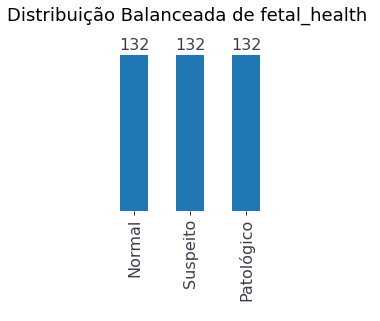

In [ ]:
f, ax = plt.subplots(figsize=(3,3))

y_res.value_counts().plot(kind='bar', ax=ax)
plt.title('Distribuição Balanceada de fetal_health \n', fontsize=18)
ax.set_xticklabels(['Normal', 'Suspeito', 'Patológico'], fontsize=16, color='#3f3f4e')
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_xlabel(' ')

for hist in ax.patches:
  ax.text(hist.get_x() + hist.get_width() / 2,
          hist.get_height() + 5,
          '{:,}'.format(int(hist.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=16 , color='#3f3f4e')


plt.show()

Aqui podemos confirmar que as classes estão balanceadas!

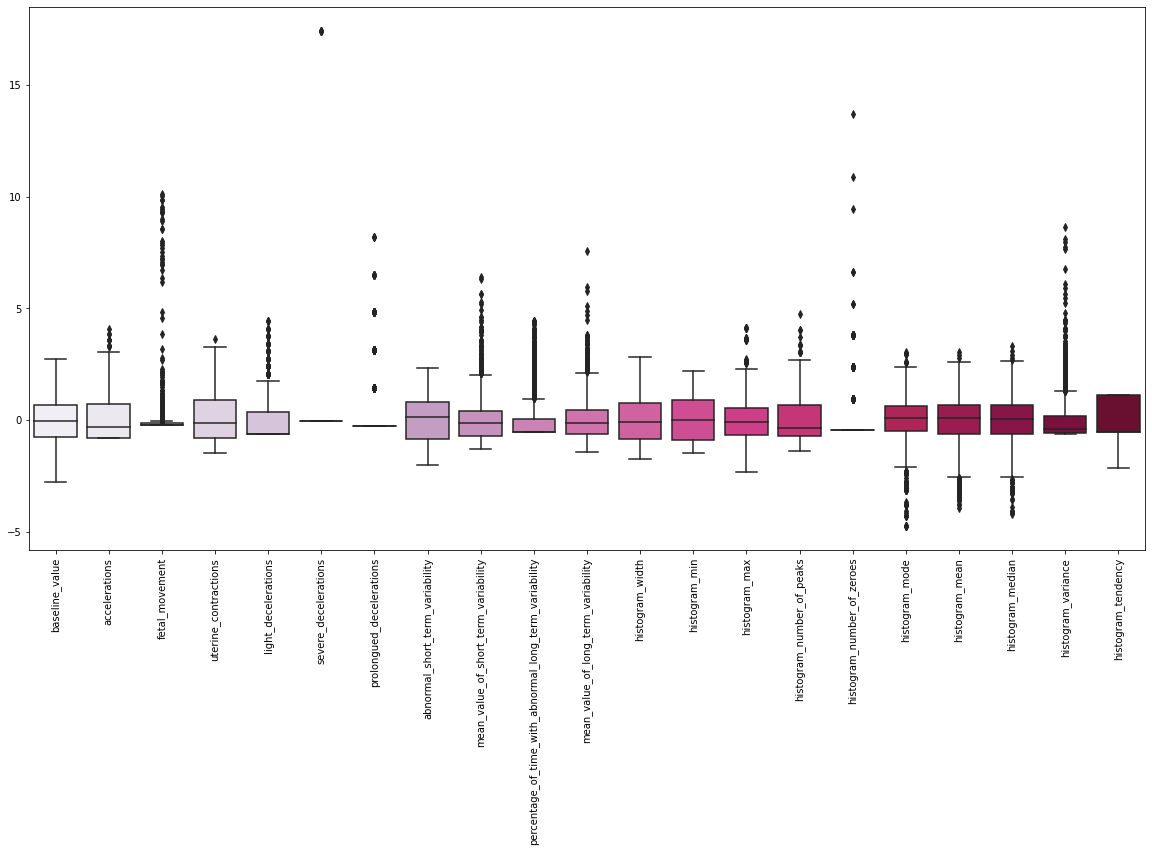

In [ ]:
# Boxplot de todas as features (fora target) após padronização
plt.figure(figsize=(20,10))
sns.boxplot(data = X, palette = 'PuRd')
plt.xticks(rotation=90)
plt.show()

A partir desse momento os dados estão balanceados e padronizados.

In [ ]:
# Classificadores
classifiers = {
    'RegressãoLogística':  LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
}

In [ ]:
print('Cross-Validation dataset original:')
for key, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  training_score = cross_val_score(classifier, X_train, y_train, scoring='f1_weighted')
  print('Classificador: ', classifier.__class__.__name__, '-', round(training_score.mean(), 2) * 100, '% f1_weighted')

print('\n')

print('Cross-Validation dataset rebalanceado:')
for key, classifier in classifiers.items():
  classifier.fit(X_res, y_res)
  training_score = cross_val_score(classifier, X_res, y_res, scoring='f1_weighted')
  print('Classificador: ', classifier.__class__.__name__, '-', round(training_score.mean(), 2) * 100, '% f1_weighted')

Cross-Validation dataset original:
Classificador:  LogisticRegression - 90.0 % f1_weighted
Classificador:  XGBClassifier - 95.0 % f1_weighted
Classificador:  KNeighborsClassifier - 89.0 % f1_weighted
Classificador:  GaussianNB - 84.0 % f1_weighted
Classificador:  SVC - 91.0 % f1_weighted


Cross-Validation dataset rebalanceado:
Classificador:  LogisticRegression - 85.0 % f1_weighted
Classificador:  XGBClassifier - 90.0 % f1_weighted
Classificador:  KNeighborsClassifier - 85.0 % f1_weighted
Classificador:  GaussianNB - 77.0 % f1_weighted
Classificador:  SVC - 85.0 % f1_weighted


É perceptível que tivemos uma baixa do f1 score do score de Cross-Validation após o balanceamento, o que indica um provável overfitting antes do balanceamento, além disso, provavelmente outras métricas (como "recall") podem ter melhorado enquanto a f1 score.

Os melhores score de Cross-Validation após o balanceamento foram do XGC, KNeighborsClassifier e do SVC. Neste trabalho, usaremos os dois primeiros citados.


## XGBoost Classifier

              precision    recall  f1-score   support

         1.0       0.98      0.87      0.92       414
         2.0       0.58      0.85      0.69        74
         3.0       0.81      0.95      0.88        44

    accuracy                           0.88       532
   macro avg       0.79      0.89      0.83       532
weighted avg       0.91      0.88      0.89       532



Matthew’s correlation coefficient: 0.724
Log loss: 0.32
AUC: 0.969




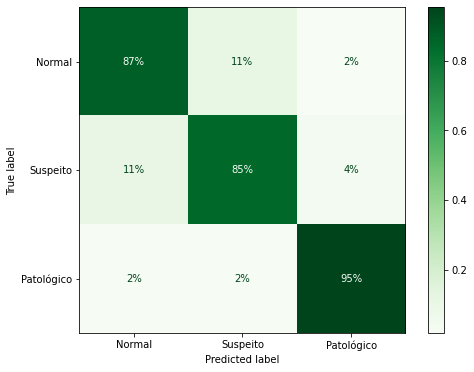

In [ ]:
# XGBClassifier
xgb = XGBClassifier(random_state=42)

xgb.fit(X_res, y_res)
xgb_pred = xgb.predict(X_test)

xgb_proba = xgb.predict_proba(X_test)

# Classification Report
print(classification_report(y_test, xgb_pred))
print('\n')

f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, cmap = 'Greens',
                                        display_labels=('Normal', 'Suspeito', 'Patológico'),
                                        ax=ax, normalize ='true', values_format= '.0%');

# Matthews_corrcoef
print('Matthew’s correlation coefficient:', round(matthews_corrcoef(y_test, xgb_pred), 3))

# Log loss (lower is better)
print('Log loss:', round(log_loss(y_test, xgb_proba), 3))

# Área sobre a Curva (AUC)
knn_auc = roc_auc_score(y_test, xgb_proba, average="weighted", multi_class="ovr")
print(f'AUC: {knn_auc:.3f}')
print('\n')

A construção do modelo XGBoost levou a ótimos resultados, com um recall de 95% e precisão de 81% para a classe patológica e 89% para as demais classes. Ou seja, para cada 100 fetos patológicos, 95 são detectados e desses 95, 81 são realmente patológicos. A média ponderada f1 score também foi ótima - 0.89.

Além disso, seu coeficiente de Matthew foi de: 0.724 e o seu Log loss: 0.32. Podemos perceber que temos ótimos números, dessa forma seus hiper-parâmetros não passarão por tunning.

As features de maior importância foram, em ordem decrescente:

* 1º percentage_of_time_with_abnormal_long_term_variability
* 2º abnormal_short_term_variability
* 3º histogram_mean

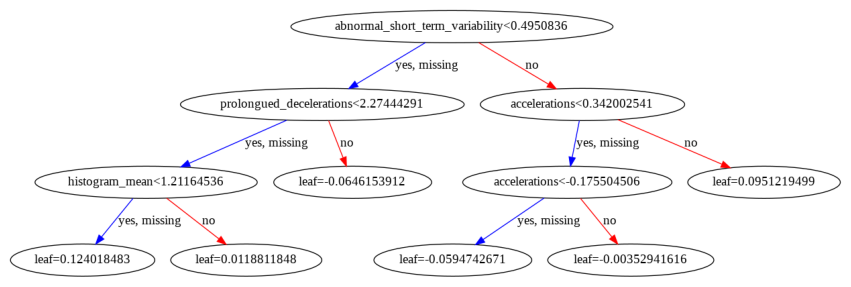

In [ ]:
# Plot da Árvore de Decisão
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

fig, ax = plt.subplots(figsize = (15,15))
plot_tree(xgb, ax=ax)
plt.show()

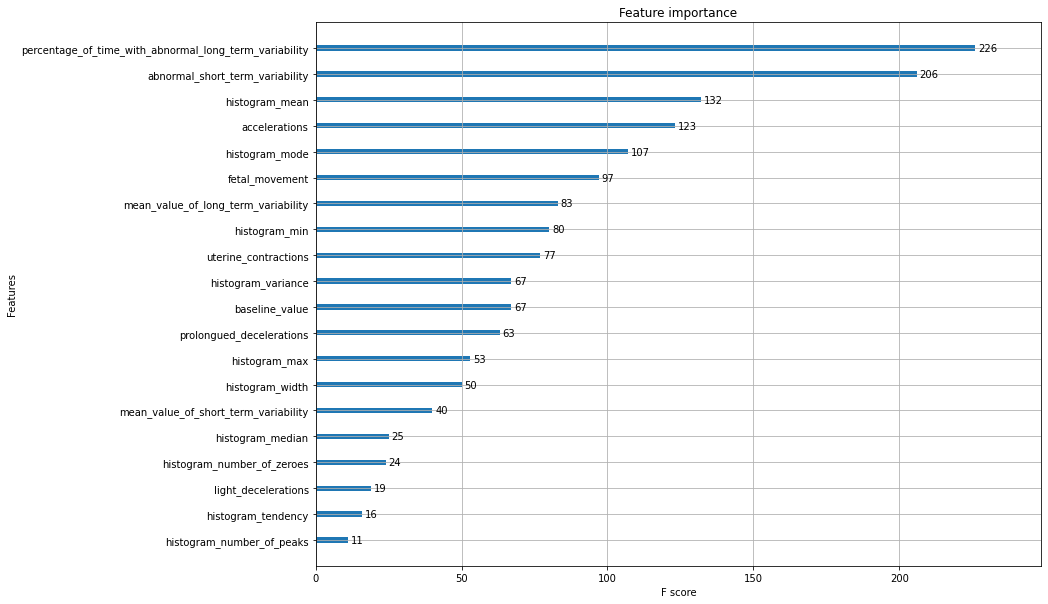

In [ ]:
fig, ax = plt.subplots(figsize = (13,10))
plot_importance(xgb, ax=ax)
plt.show();

## KNN Classifier

O K-nearest neighbors Classifier é um classificador que tem como base a distância dos números dos vizinhos dos valores das features para classificar o target. Como sofre grande interferência de escala, os dados já foram previamente padronizados para otimizar os resultados. Para achar o número ideal de `n_neighbors` será usado GridSearchCV.

In [ ]:
# KNeighborsClassifier GridSearchCV
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [1,2,3,5,6,8],
              'weights': ('uniform', 'distance')}

knn_grid_search = GridSearchCV(knn, knn_params, scoring="f1_weighted", n_jobs=-1)

knn_grid_result = knn_grid_search.fit(X_res, y_res)

# ver resultados
print(f" {knn_grid_search.best_params_}")

 {'n_neighbors': 8, 'weights': 'distance'}


              precision    recall  f1-score   support

         1.0       0.98      0.84      0.91       414
         2.0       0.48      0.78      0.59        74
         3.0       0.65      0.82      0.73        44

    accuracy                           0.83       532
   macro avg       0.70      0.81      0.74       532
weighted avg       0.88      0.83      0.85       532



Matthew’s correlation coefficient: 0.637
Log loss: 1.018
AUC: 0.949




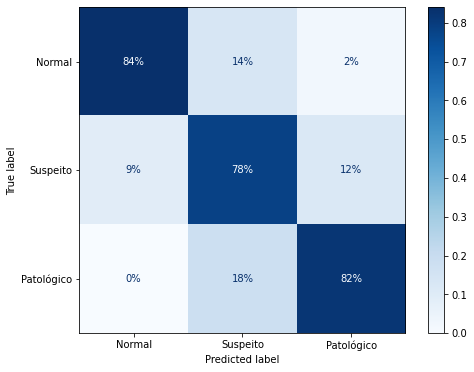

In [ ]:
# # KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn.fit(X_res, y_res)
knn_pred = knn.predict(X_test)
knn_proba =knn.predict_proba(X_test)

# Classification Report
print(classification_report(y_test, knn_pred))
print('\n')

# Matriz de Confusão
f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, cmap = 'Blues',
                                        display_labels=('Normal', 'Suspeito', 'Patológico'),
                                        ax=ax, normalize ='true', values_format= '.0%');

# Matthews_corrcoef
print('Matthew’s correlation coefficient:', round(matthews_corrcoef(y_test, knn_pred), 3))

# Log loss (lower is better)
print('Log loss:', round(log_loss(y_test, knn_proba), 3))

# Área sobre a Curva (AUC)
knn_auc = roc_auc_score(y_test, knn_proba, average="weighted", multi_class="ovr")
print(f'AUC: {knn_auc:.3f}')
print('\n')

(O GridSearchCV pode mostrar resultados diferentes devido à natureza do classificador, como por exemplo um valor diferente para n_neighbors)

O modelo KNN obteve um recall de 82% e precisão de 65% para a classe patológica e recall de para as demais classes. As médias ponderadas do f1 score foi de 0.85.

Seu score coeficiente de Matthew foi de: 0.637 e o seu Log loss: 1.018

Apesar de ter bons números, o desempenho do XGBoost foi melhor que o KNN.

<p align=center>
<img src="https://raw.githubusercontent.com/Diego875621/Data_Science/main/Fetal%20Health%20Classification/child_exam.jpg" width="50%"></p>
<p align=center>Fonte: Freepik

# Conclusões

O exame de cardiotocografia se baseia na medição da frequência cardíaca fetal, a atividade uterina e a percepção de movimento fetal, que juntamente, apontam como está a saúde cardíaca do feto e se o mesmo tem risco de desenvolver hipóxia e é mais usado em gestantes de alto risco. Os parâmetros de maior indicação de patologia são a frequência cardíaca fetal base (FCF base) e os níveis de desacelerações.

`fetal_health` é a variável alvo. Todas as features estão em formatos numéricos e não há valores ausentes. Os gráficos de histograma apontam várias features com distribuições distorcidas. As classes estão desbalanceadas. Logo foi preciso usar padronização e balanceamento no dataset. As principais features com correlação com `fetal_health` foram (+): `prolongued_decelerations` e `abnormal_short_term_variability` e (-) `accelerations`.   

Gráficos de `abnormal_short_term_variability` indica que acima de 55% em diante do tempo com variabilidade anormal de curto prazo já aumenta significantemente o risco de feto patológico. Gráficos de `prolongued_decelerations` - as desacelerações prolongadas apontam  que a classe patológica é a que predomina com valores que variam de 0.001 até 0.005 enquanto as outras duas classes se encontram zeradas (com exceção dos outliers).

Dentre os classificadores analisados, o XGBoost parece desempenhar melhor, obtendo ótimas métricas de Recall, F1 score e pouco Log Loss. Os modelos classificadores aqui desenvolvidos podem ser juntados em sistemas de informações para que, juntamente com a equipe médica, ajude na triagem e a detectar casos de fetos não saudáveis rapidamente e dessa forma prevenir problemas para a mãe e para o feto. Dessa maneira, a inteligência artificial pode ajudar os profissionais de saúde a tomar melhores decisões com base nos resultados previsto pelos modelos de machine learning.

Por exemplo, Mancuso e outros pesquisadores (2008) observaram o nível de ansiedade antes e após o exame CTG, e perceberam que antes as mulheres estavam mais calmas do que após o procedimento. Isso deve acender uma luz de alerta para resultados enviesados. É importante destacar também que os modelos devem ser trabalhos juntamente com a clínica do paciente e também outros exames devam ser feitos, como por exemplo ultrassonografia com doppler, para que seja confirmada se realmente há problemas com a saúde fetal do feto e dessa forma, que um diagnóstico seja determinado. Ou seja, as ferramentas disponíveis devem ser trabalhadas de maneira holística e correlacionadas.





**Referências:**

GRIVELL, Rosalie M. et al. Antenatal cardiotocography for fetal assessment. Cochrane database of systematic reviews, n. 9, 2015.

MANCUSO, Alfredo et al. Effects of antepartum electronic fetal monitoring on maternal emotional state. Acta Obstetricia et Gynecologica Scandinavica, v. 87, n. 2, p. 184-189, 2008.

**Fonte das imagens:**

<a href="https://www.freepik.com/free-vector/pregnancy-ultrasound-screening-retro-cartoon-illustration_4186221.htm#query=fetus%20heart&position=1&from_view=search&track=sph">Image by macrovector</a> on Freepik

<a href="https://www.freepik.com/free-vector/baby-birth-concept-illustration_21532448.htm#query=fetus&position=12&from_view=search&track=sph">Image by storyset</a> on Freepik